In [1]:
import torch
import pickle
from tqdm import tqdm

class Experiment:
    def __init__(self, model, criterion, optimizer, device='cpu'):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device

        self.loss = []
        self.epoch_loss = []

        self.loss_loaded = False
        self.weights_loaded = False

    def train(self, train_loader, epochs=10):
        N = len(train_loader)
        for epoch in range(1, epochs + 1):
            self.model.train()
            epoch_loss = 0
            with tqdm(enumerate(train_loader), total=N / train_loader.batch_size, desc=f'Epoch {epoch}/{epochs}', unit='batch') as pbar:
                for i, data in pbar:
                    images, labels = data

                    images = images.to(self.device)
                    labels = labels.to(self.device)

                    pred = self.model(images)

                    loss = self.criterion(pred, labels)

                    self.optimizer.zero_grad()
                    loss.backward()
                    torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)

                    epoch_loss += loss
                    pbar.set_postfix(loss = loss.value)

            print(f'{epoch}/{epochs} loss: {epoch_loss / N}')
            self.epoch_loss.append(epoch_loss / N)
            epoch_loss = 0
        
        self.loss_loaded = True
        self.weights_loaded = True
        print("Training Complete")

    def save_weights(self, file_name):
        assert self.weights_loaded
        assert file_name.ends_with(".pth")

        torch.save(self.model.state_dict(), file_name)

    def save_loss(self, file_name):
        assert self.loss_loaded
        assert file_name.ends_with(".pkl")

        loss_dict = dict(loss=self.loss, epoch_loss=self.epoch_loss)

        with open(file_name, 'wb') as f:
            pickle.dump(loss_dict, f)

    def plot_loss():
        pass

    def load_model(self, file_name):
        pass

In [2]:
from GvaDataset import GvaDataset
from torch.utils.data import random_split, DataLoader
import torchvision.transforms as transforms 

transform = transforms.Compose([
    transforms.Resize((1024, 512))
])

images_path = "data/images/"
labels_path = "data/labels"
dataset = GvaDataset(images_path, labels_path, transform=transform)
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)

c:\Users\chris\anaconda3\envs\gva\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 1024, 512])
torch.Size([1, 1024, 512])


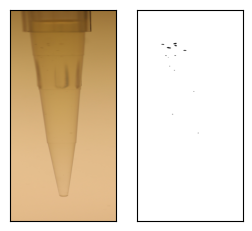

In [3]:
import matplotlib.pyplot as plt


img, lab = dataset[0]

print(img.shape)
print(lab.shape)
lab = lab.squeeze(0)

fig, ax = plt.subplots(1, 2, figsize=(3, 10))
ax[0].imshow(img.permute(1, 2, 0))
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].imshow(lab, cmap="gray")

In [4]:
from models.unet import UNet
import torch.optim as optim
import torch.nn as nn

device = 'cpu'
model = UNet(in_channels=3, out_channels=1)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
experiment = Experiment(model, criterion, optimizer, device)

In [5]:
experiment.train(train_loader=train_loader, epochs=10)

Epoch 1/10:   0%|          | 0/5.0 [00:00<?, ?batch/s]

Epoch 1/10: 100%|██████████| 5/5.0 [02:02<00:00, 24.59s/batch, loss=tensor(-0., grad_fn=<DivBackward1>)]


1/10 loss: 0.0


Epoch 2/10: 100%|██████████| 5/5.0 [01:53<00:00, 22.72s/batch, loss=tensor(-0., grad_fn=<DivBackward1>)]


2/10 loss: 0.0


Epoch 3/10:   0%|          | 0/5.0 [00:05<?, ?batch/s]


KeyboardInterrupt: 